# Montu Python 
## Astronomical ephemerides for the Ancient World

## Quickstart

In this section you should provide the most simple instructions to use
your package.

For instance:

In [1]:
# from montu import *

or for a safe import:

In [2]:
import montu
%load_ext autoreload
%autoreload 2

### Working with stars

`MontuPython` comes along with a complete catalogue of around 119000 stars.  You may load the catalogue using:

In [3]:
allstars = montu.Stars()

Once loaded the attribute `allstars.data` contains a Pandas DataFrame with all the data about the star, including position in the sky (right ascension and declination), magnitude, color index, proper motion among many other properties.

You can extract a subset of stars using the method `get_stars`. For instance you can get only the stars visible to naked eye:

In [4]:
stars = allstars.get_stars(Vmag=[-2,6.5])

Or extract the information of a single star, eg. Aldebaran:

In [5]:
aldebaran = stars.get_stars(ProperName='Aldebaran')

You may also extract stars around a given point in the sky. For instance, the following code gives you the stars around Aldebaran position:

In [6]:
hyades = stars.get_stars_around(center=[aldebaran.data.RAJ2000,aldebaran.data.DecJ2000],radius=5.5,Vmag=[-1,5])

And now you can create a map of the region:

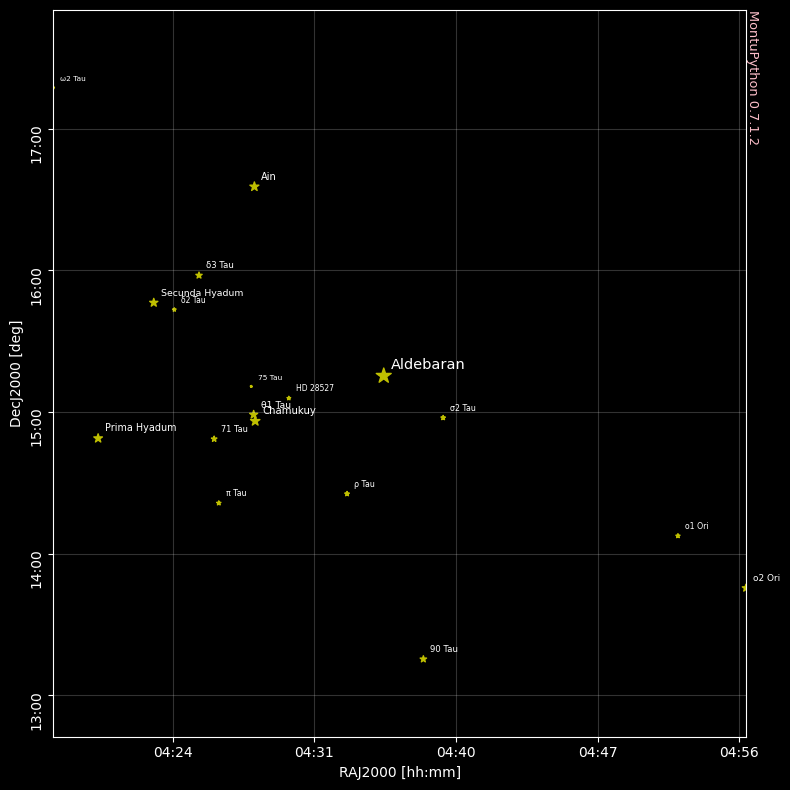

In [7]:
fig,axs = hyades.plot_stars()

Save the figure:

In [8]:
fig.savefig('gallery/hyades.png')

The resulting figure will be:

<p align="center"><img src="https://github.com/seap-udea/MontuPython/blob/main/dev/gallery/hyades.png?raw=true" alt="Logo""/></p>


### Working with time

One of the most interesting and basic functionalities of MontuPython is to convert date among 
different type of calendars and astronomical scales.  You may taste these functionalities using:

In [9]:
mtime = montu.Time('bce2501-01-01 12:00:00')

other alternative formats for the same date are:

In [10]:
mtime = montu.Time('2501 b.c.e. 01-01 12:00:00')
mtime = montu.Time('-2500-01-01 12:00:00')

If you print this time object you will get:

In [11]:
print(mtime)

Montu Time Object:
--------------------------
Date in proleptic UTC: -2500-01-01 12:00:00.0002
Date in mixed UTC: -2500-01-22 12:00:00
Date in SPICE format: 2501 B.C. 01-01 12:00:00.200
General:
    Components: [-1, 2500, 1, 1, 12, 0, 0, 200]
    Is bce: True
    Is Julian: True
Uniform scales:
    Terrestrial time:
        tt: -142006202700.3199
        jtd: 807954.69096852
    UTC time:
        et: -142006262399.99988
        jed: 807954.0
    Delta-t = TT - UTC = 59699.68000000001
Objects:
    Date in datetime64 format: -2500-01-01T12:00:00.000200
    Date in PyPlanet Epoch: 807954.0
    Date in PyEphem Epoch: -2501/1/22 12:00:00
    Date in AstroPy Time: 807954.69096852
Astronomical properties at Epoch:
    True obliquity of ecliptic: 23:58:33.587
    True nutation longitude: 00:00:10.214
    Greenwhich Meridian Sidereal Time: 18:40:25.323



Notice that the date in Gregorian proleptic will be 2501 b.c.e 01-01 but in the mixed calendar that uses Julian calendar before its adoption at 1582-10-04, will be 2501 bce 01-22.

You may add or substract time to a given date, adding or substracting seconds:

In [12]:
mtime + 10*montu.DAY, mtime-1*montu.CALYEAR, mtime + 10*montu.JULYEAR

(Time('-2500-01-11 12:00:00.0001'/'-2500-02-01 12:00:00'),
 Time('-2501-01-01 11:59:32.3489'/'-2501-01-22 11:59:59'),
 Time('-2490-01-02 00:04:36.1602'/'-2490-01-22 00:04:04'))

You need to take into account that adding or substracting seconds will not produce exact dates since calendar is an imperfect sclae.

### Working with planets

For this we need to load precision information about the planets using:

In [13]:
montu.Util.load_kernels(montu.PRECISION_KERNELS)

> **NOTE**: *Precision kernels* are binary files used by the NASA NAIF SPICE information system which is used by `MontuPython` to calculate with the highest precision the position of the planets in the present and in the past. Some of them are large files (in the order of Giga bytes) so you need enough space to download them.


First we need to prepare some basic objects, the Earth (where the observer is), the location on Earth, the time of observation and the object to be observed. First define the planet where the observation will be taken place and the planet to be observed:

In [14]:
earth = montu.Planet('Earth')
mars = montu.Planet('Mars')

Create now the observing site on Earth:

In [15]:
tebas = montu.Observer(planet=earth,lon=33,lat=24,height=0)

The straight routine method to calculate position of the planet in the sky at any date is:

In [16]:
mtime = montu.Time('-2500-01-01 12:00:00')
mars.where_among_stars(mtime,tebas)

print(f"Coordinates at Epoch JD {mtime.jed} in reference J2000:",
      montu.D2H(mars.RAJ2000),montu.D2H(mars.DecJ2000))

Coordinates at Epoch JD 807954.0 in reference J2000: 12:31:48.754 01:37:12.184


You may get the all the information about the planet using its attributes (eg. `mars.RAJ2000`). However there are also an internal dictionary with all the relevant information abou the planet.

In [17]:
mars.position

{'datepro': ['-2500-01-01 12:00:00.0002'],
 'datemix': ['-2500-01-22 12:00:00'],
 'datetime64': [numpy.datetime64('-2500-01-01T12:00:00.000200')],
 'tt': [-142006202700.3199],
 'jtd': [807954.69096852],
 'jed': [807954.0],
 'RAJ2000': [12.530209373509585],
 'DecJ2000': [1.6200510817611884],
 'LonJ2000': [186.66304143027318],
 'LatJ2000': [4.64341881132123],
 'site_distance': [0.660450348835636],
 'sun_distance': [1.626114972997512],
 'elongation': [157.82190986740468],
 'phase': [13.358883700461687],
 'mag': [-1.1]}

You may get also the position at different times and store it into a data frame:

In [18]:
import numpy as np
mars.reset_store()
for deltat in np.linspace(0,100*montu.YEAR,100):
    mars.where_among_stars(mtime + deltat,tebas,store=True)

In [19]:
mars.data.head(3)

,datepro,datemix,datetime64,tt,jtd,jed,RAJ2000,DecJ2000,LonJ2000,LatJ2000,site_distance,sun_distance,elongation,phase,mag
0,-2500-01-01 12:00:00.0002,-2500-01-22 12:00:00,-2500-01-01T12:00:00.000200,-1.42006202700319885e+11,807954.69096852000802755,807954.00000000000000000,12.53020937350958519,1.62005108176118839,186.66304143027318219,4.64341881132123024,0.66045034883563603,1.62611497299751195,157.82190986740468475,13.35888370046168738,-1.10000000000000009
1,-2499-01-05 10:33:11.2813,-2499-01-25 10:33:33,-2499-01-05T10:33:11.281300,-1.41974326336683472e+11,808323.63036246004048735,808322.93971389997750521,0.57059667267726077,2.68531627918021609,8.91983179771346890,-0.92539484526098659,2.35303914307601181,1.46063610931080845,20.36602019908721672,13.73426394166917675,1.39999999999999991
2,-2498-01-09 09:06:22.5562,-2498-01-29 09:06:06,-2498-01-09T09:06:22.556200,-1.41942449973047058e+11,808692.56975639995653182,808691.87942772998940200,15.21006956069311933,-14.98730798340619152,229.81572237261121927,2.80642288243706561,0.80028482770429943,1.57802849710885629,122.36237126387342755,32.27329784034182580,-0.80000000000000004


### Let's do some magic (*Heka*)

It's time to do something really nice. Ancient egyptian call it *heka* or magic.

Comparison

In [20]:
import tqdm
mars.reset_store()
for deltat in tqdm.tqdm(np.linspace(0,100*montu.YEAR,100)):
    mars._compare_positions(mtime + deltat,tebas,method='all',store=True)

100%|██████████| 100/100 [00:08<00:00, 11.83it/s]


In [21]:
import copy
mars_comparison = copy.deepcopy(mars.data)

In [22]:
montu.PRINTDF(mars_comparison.head(3))

,datepro,datemix,datetime64,tt,jtd,jed,RAJ2000,DecJ2000,RAEpoch,DecEpoch,LonJ2000,LatJ2000,LonEpoch,LatEpoch,tsa,HA,az,el,site_distance,sun_distance,elongation,phase,mag,RAJ2000_Horizons,DecJ2000_Horizons,RAEpoch_Horizons,DecEpoch_Horizons,LonJ2000_Horizons,LatJ2000_Horizons,LonEpoch_Horizons,LatEpoch_Horizons,tsa_Horizons,HA_Horizons,az_Horizons,el_Horizons,site_distance_Horizons,sun_distance_Horizons,elongation_Horizons,phase_Horizons,mag_Horizons,RAJ2000_VSOP87,DecJ2000_VSOP87,RAEpoch_VSOP87,DecEpoch_VSOP87,LonJ2000_VSOP87,LatJ2000_VSOP87,LonEpoch_VSOP87,LatEpoch_VSOP87,tsa_VSOP87,HA_VSOP87,az_VSOP87,el_VSOP87,site_distance_VSOP87,sun_distance_VSOP87,elongation_VSOP87,phase_VSOP87,mag_VSOP87,RAJ2000_SPICE,DecJ2000_SPICE,RAEpoch_SPICE,DecEpoch_SPICE,LonJ2000_SPICE,LatJ2000_SPICE,LonEpoch_SPICE,LatEpoch_SPICE,tsa_SPICE,HA_SPICE,az_SPICE,el_SPICE,site_distance_SPICE,sun_distance_SPICE,elongation_SPICE,phase_SPICE,mag_SPICE
0,-2500-01-01 12:00:00.0002,-2500-01-22 12:00:00,-2500-01-01T12:00:00.000200,-1.42006202700319885e+11,807954.69096852000802755,807954.00000000000000000,12.53020937350958519,1.62005108176118839,8.53605441277297849,24.10793190255713725,186.66304143027318219,4.64341881132123024,124.3559838685027330,4.65148295142333090,20.87370072281167666,12.33764631003869816,6.19007652077834880,-41.64197048578358817,0.66045034883563603,1.62611497299751195,157.82190986740468475,13.35888370046168738,-1.10000000000000009,12.53031866666666616,1.61853000000000002,8.53591199999999972,24.10820999999999970,186.66515487708795717,4.64266929295638153,124.35402000000000555,4.65128309999999967,20.87370466843072236,12.33779266843072264,6.19270199999999971,-41.64147700000000185,0.66052182424896000,1.62612486672299994,157.79750000000001364,13.37079999999999913,-1.10000000000000009,12.53009988747560577,1.62586365836117386,8.53603279281541383,24.11136669676964672,186.65922350328585821,4.64810923348556582,124.35483062334007798,4.65473321461099765,20.87370069598135558,12.33766790316594353,6.18997376787947662,-41.63852365221730878,0.66048830747604370,1.62610709667205811,157.81835937500000000,13.36350889596773150,-1.12999999999999989,12.53020937350958519,1.62005108176118839,8.53605441277297849,24.10793190255713725,186.66304143027318219,4.64341881132123024,124.3559838685027330,4.65148295142333090,20.87370072281167666,12.33764631003869816,6.19007652077834880,-41.64197048578358817,0.66045034883563603,1.62611497299751195,157.82190986740468475,13.35888370046168738,-1.10000000000000009
1,-2499-01-05 10:33:11.2813,-2499-01-25 10:33:33,-2499-01-05T10:33:11.281300,-1.41974326336683472e+11,808323.63036246004048735,808322.93971389997750521,0.57059667267726077,2.68531627918021609,20.62897813153846371,-19.94836446057016133,8.91983179771346890,-0.92539484526098659,306.6674700894606076,-0.95765005369939971,19.66985772233765317,23.04087959079918946,161.09614242663516848,43.87091889790201549,2.35303914307601181,1.46063610931080845,20.36602019908721672,13.73426394166917675,1.39999999999999991,0.56986533333333333,2.68001999999999985,20.62714199999999920,-19.95626999999999995,8.90767216156517350,-0.92595311203044484,306.64041539999999486,-0.95862709999999995,19.66986086088999741,23.04271886089000176,161.13373999999998887,43.87157100000000298,2.35298322508177016,1.46061008286799998,20.36580000000000013,13.72879999999999967,1.39999999999999991,0.56949083163113778,2.67179674042495385,20.62773475240857834,-19.95712701623519791,8.89927701384101333,-0.93130566437150875,306.64826858302836854,-0.96159083970206927,19.66985797500848321,23.04212322259990131,161.12305602995525078,43.86811596336291075,2.35298705101013184,1.46063888072967529,20.36293792724609375,13.73518318777414038,1.37999999999999989,0.57059667267726077,2.68531627918021609,20.62897813153846371,-19.94836446057016133,8.91983179771346890,-0.92539484526098659,306.6674700894606076,-0.95765005369939971,19.66985772233765317,23.04087959079918946,161.09614242663516848,43.87091889790201549,2.35303914307601181,1.46063610931

In the calculation above we compute the position of mars among the stars. Astronomers say that the position was calculated in right ascension and declination.  But we want to knwo the position above the heads of people living in a city at a given time. We measure this position using *azimuth* and *elevation*. We compute this in `MontuPython` using:

In [27]:
import numpy as np
mars.reset_store()
for deltat in np.linspace(0,100*montu.YEAR,100):
    mars.where_among_stars(mtime + deltat,tebas,store=True)

In [28]:
montu.Heka.where_in_sky(mars.data,tebas,inplace=True,bar=True)

100%|██████████| 100/100 [00:00<00:00, 253.80it/s]


In [29]:
montu.PRINTDF(mars.data.head(1))

,datepro,datemix,datetime64,tt,jtd,jed,RAJ2000,DecJ2000,LonJ2000,LatJ2000,site_distance,sun_distance,elongation,phase,mag,RAEpoch,DecEpoch,RAEpoch_comp,DecEpoch_comp,HA,az,el,zen,HA_comp,az_comp,el_comp,zen_comp
0,-2500-01-01 12:00:00.0002,-2500-01-22 12:00:00,-2500-01-01T12:00:00.000200,-1.42006202700319885e+11,807954.69096852000802755,807954.0,12.53020937350958519,1.62005108176118839,186.66304143027318219,4.64341881132123024,0.66045034883563603,1.62611497299751195,157.82190986740468475,13.35888370046168738,-1.10000000000000009,8.53605441277297672,24.10793190255713725,8.53605441277297672,24.10793190255713725,12.33764631003869994,6.19007652077837989,-41.64197048578358817,131.64197048578358817,12.33764631003869994,6.19007652077837989,-41.64197048578358817,131.64197048578358817


In [30]:
(mars_comparison.az_SPICE-mars.data.az_comp).max(),(mars_comparison.el_SPICE-mars.data.el_comp).max(),(mars_comparison.DecEpoch_SPICE-mars.data.DecEpoch_comp).max()

(1.9895196601282805e-13, 5.684341886080802e-14, 2.1316282072803006e-14)

['90', '75', '60', '45', '30', '15']


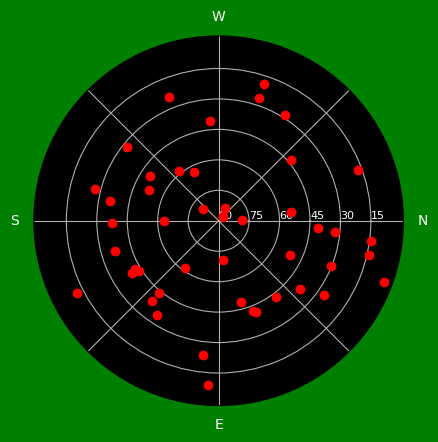

In [31]:
import matplotlib.pyplot as plt
cond = (mars.data.el > 0)
fig,axs = plt.subplots(subplot_kw=dict(projection='polar'),facecolor='g')
axs.set_facecolor('black')

ax = axs
ax.plot(mars.data[cond].az,mars.data[cond].zen,'ro')
#ax.set_rlabel('Zenital angle')
ax.set_rticks(np.arange(0,90,15));
"""
rtlabels = []
rts = ax.get_rticks()
for rt in rts:
    print(rt)
"""

# Change horizontal levels
el_labels = []
zs = ax.get_yticks()
for z in zs:
    el_labels += [f'{90-z}']
print(el_labels)
ax.set_xticklabels(['N', '', 'W', '', 'S', '', 'E', ''],color='w');
ax.set_yticklabels(el_labels,color='w',fontsize=8);
ax.set_rlabel_position(0);
ax.set_rgrids(np.arange(0,90,15),angle=0);

#### Daily motion of planet and stars

In [ ]:
aldebaran_path = montu.Heka.move_over_nut(aldebaran,tebas,mtime,duration=24*montu.HOUR)

In [ ]:
aldebaran_path[cond]

,tt,HA,az,el,zen,isvisible
0,-1.42006202700319885e+11,20.26347258354249092,107.59803874951610680,29.59267135770541302,60.40732864229458698,True
1,-1.42006199100319885e+11,21.26621055421905027,117.58975997273519454,42.28876238929495912,47.71123761070504088,True
2,-1.42006195500319885e+11,22.26894852489560606,132.52978054276744047,53.58166098629541807,36.41833901370458193,True
3,-1.42006191900319885e+11,23.27168649557216895,156.47319763281205951,61.67934399839950288,28.32065600160049712,True
4,-1.42006188300319885e+11,0.27442446624872829,189.23213033626191759,63.44361782998849009,26.55638217001150991,True
5,-1.42006184700319885e+11,1.27716243692528408,217.99201452160556869,57.81116830188295097,32.18883169811704903,True
6,-1.42006181100319885e+11,2.27990040760184343,236.47659018009025544,47.64761138215594372,42.35238861784405628,True
7,-1.42006177500319885e+11,3.28263837827840632,248.29517340103859624,35.45060952542873878,54.54939047457126122,True
8,-1.42006173900319885e+11,4.28537634895496211,256.73139024037061517,22.34292990838107684,67.65707009161891961,True
9,-1.42006170300319885e+11,5.28811431963152145,263.53774104708764980,8.80976299005123664,81.19023700994875981,True


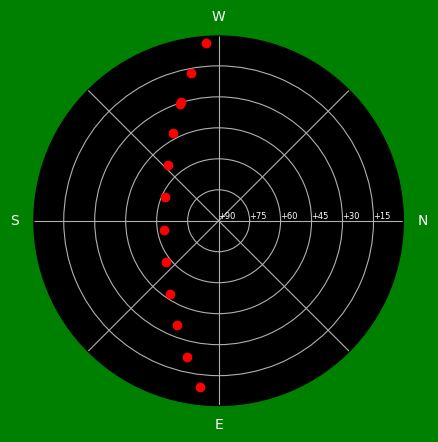

In [ ]:
import matplotlib.pyplot as plt

cond = (aldebaran_path.el > 0)
fig,axs = plt.subplots(subplot_kw=dict(projection='polar'),facecolor='g')
axs.set_facecolor('black')

ax = axs
ax.plot(aldebaran_path[cond].az*montu.DEG,aldebaran_path[cond].zen,'ro')
ax.set_rticks(np.arange(0,90,15));

# Change horizontal levels
el_labels = []
zs = ax.get_yticks()
for z in zs:
    el_labels += [f'+{90-z}']
ax.set_xticklabels(['N', '', 'W', '', 'S', '', 'E', ''],color='w');
ax.set_yticklabels(el_labels,color='w',fontsize=6);
ax.set_rlabel_position(0);
ax.set_rgrids(np.arange(0,90,15),angle=0);

#### Test pmRA, pmDec planets

In [ ]:
mtime = montu.Time('-2500-01-01 12:00:00.0')
mars.where_among_stars(mtime,tebas,verbose=True)
mars.position

{'datepro': ['-2500-01-01 12:00:00.0002'],
 'datemix': ['-2500-01-22 12:00:00'],
 'datetime64': [numpy.datetime64('-2500-01-01T12:00:00.000200')],
 'tt': [-142006202700.3199],
 'jtd': [807954.69096852],
 'jed': [807954.0],
 'RAJ2000': [12.530209373509585],
 'DecJ2000': [1.6200510817611884],
 'pmRA': [-1.815502350071593e-07],
 'paRA': [-9.464568160478493e-14],
 'pmDec': [1.5214863273097303e-06],
 'paDec': [4.5181043240330724e-13],
 'LonJ2000': [186.66304143027318],
 'LatJ2000': [4.64341881132123],
 'pmLon': [-3.1120848931009557e-06],
 'paLon': [-1.4875390434711771e-12],
 'pmLat': [3.2165605169439915e-07],
 'paLat': [-1.5454262953085254e-13],
 'site_distance': [0.660450348835636],
 'sun_distance': [1.626114972997512],
 'elongation': [157.82190986740468],
 'phase': [13.358883700461687],
 'mag': [-1.1],
 'XJ2000': [-97214029.77807501],
 'YJ2000': [-13165540.467449956],
 'ZJ2000': [3002744.7342745606],
 'VXJ2000': [6.775543092407669],
 'VYJ2000': [5.8329320803873514],
 'VZJ2000': [2.4442060

In [ ]:
mtime1=mtime
mtime2=mtime+10*montu.DAY

In [ ]:
%timeit -n 100 [mars.where_among_stars(t,tebas,verbose=False,propermotion=True,store=False) for t in [mtime1,mtime2]]

1.13 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
mars._calculate_coordinates(mtime.tt,tebas)

array([ 12.530209373509585 ,   1.6200510817611884, 186.66304143027318  ,
         4.64341881132123  ])

In [ ]:
%timeit -n 100 [mars._calculate_coordinates(t,tebas) for t in (mtime1.tt,mtime2.tt)]

335 µs ± 45.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Check that it works:

In [ ]:
mtime = montu.Time('-3500-12-21 12:00:00.0')
mars.reset_store()
for t in montu.Util.arange(0,3*montu.DAY,1*montu.HOUR,100):
    mars.where_among_stars(mtime+t,tebas,store=True)

In [ ]:
def leap_frog(x0,dxdt0,d2xdt2,tts):
    dt = tts[1] - tts[0]
    dxdt = dxdt0
    x = [x0]
    for t in tts[1:]:
        dxdt = dxdt + d2xdt2*dt
        x += [x[-1] + dxdt*dt]
    return np.array(x)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tts = mars.data.tt.to_numpy()
t0 = tts[0]
RA0 = mars.data.RAJ2000.iloc[0]
pmRA0 = mars.data.pmRA.iloc[0]
paRA0 = mars.data.paRA.iloc[0]
RA_preds = leap_frog(RA0,pmRA0,1*paRA0,tts)

In [ ]:
tts = mars.data.tt.to_numpy()
t0 = tts[0]
Dec0 = mars.data.DecJ2000.iloc[0]
pmDec0 = mars.data.pmDec.iloc[0]
paDec0 = mars.data.paDec.iloc[0]
Dec_preds = leap_frog(Dec0,pmDec0,1*paDec0,tts)

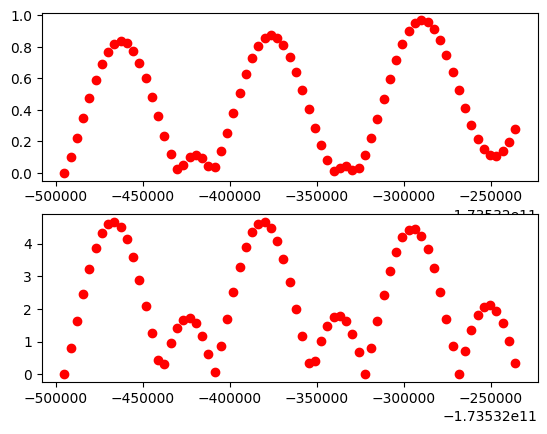

In [ ]:
fig,axs=plt.subplots(2,1)
axs[0].plot(tts,3600*abs(mars.data.RAJ2000-RA_preds),'ro')
axs[1].plot(tts,3600*abs(mars.data.DecJ2000-Dec_preds),'ro')

In [ ]:
montu.Time(aldebaran_path.iloc[-1].tt)

Time('-2500-01-02 12:00:00.0001'/'-2500-01-23 12:00:00')

In [ ]:
ipos = -1
mtest = montu.Time(aldebaran_path.iloc[ipos].tt)
newpos = montu.Heka.where_in_sky(aldebaran,tebas,mtest)
mtest.jed, montu.D2H(aldebaran_path.iloc[ipos].az),montu.D2H(aldebaran_path.iloc[ipos].el), montu.D2H(newpos.az), montu.D2H(newpos.el)

(807955.0, '108:09:31.302', '30:26:58.716', '108:09:31.302', '30:26:58.716')

In [ ]:
mars_path = montu.Heka.move_over_nut(mars.data.iloc[0],tebas,mtime,duration=24*montu.HOUR)

Is Series!


UnboundLocalError: local variable 'pmRA' referenced before assignment

In [ ]:
hyades.number

33

## Evolution of pole stars

In [ ]:
# Montu packages and data
from montu import *

# These magic commands are intended to allow updating the packages if they change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Choose from database all bright stars that according to [wikipedia](https://en.wikipedia.org/wiki/Pole_star#Precession_of_the_equinoxes) were or will be close to the celestial North pole:

In [ ]:
star_names = ('Polaris','Vega','Thuban','Deneb','Alderamin','Kochab')
stars = ALL_STARS.get_stars(ProperName=star_names)
stars.data

,StarID,Hip,HD,HR,Gliese,BayerFlamsteed,ProperName,RAJ2000,DecJ2000,Distance,Mag,AbsMag,Spectrum,ColorIndex
8221,8222,11767,8890.0,424.0,NaN,1Alp UMi,Polaris,2.52974312000000001,89.26413804999999968,132.27513227513199467,1.96999999999999997,-3.63739102249396984,F7:Ib-IIv SB,0.63600000000000001
50003,50004,68756,123299.0,5291.0,NaN,11Alp Dra,Thuban,14.07317388999999963,64.37580873000000281,94.69696969696970257,3.66999999999999993,-1.21168040901103002,A0III SB,-0.04900000000000000
52553,52554,72607,131873.0,5563.0,NaN,7Bet UMi,Kochab,14.84510983000000017,74.15547596000000397,38.77471888328810223,2.06999999999999984,-0.87274328931031198,K4IIIvar,1.46500000000000008
65794,65795,91262,172167.0,7001.0,Gl 721,3Alp Lyr,Vega,18.61560722000000112,38.78299310999999960,7.75614674629643996,0.03000000000000000,0.58176991332001105,A0Vvar,-0.00100000000000000
74083,74084,102098,197345.0,7924.0,NaN,50Alp Cyg,Deneb,20.69053150999999957,45.28033423000000113,990.09900990099004048,1.25000000000000000,-8.72839313108677928,A2Ia,0.09200000000000000
76422,76423,105199,203280.0,8162.0,Gl 826,5Alp Cep,Alderamin,21.30960598000000061,62.58545528999999874,14.96110113704370015,2.45000000000000018,1.57518220610676996,A7IV-V,0.25700000000000001


Now precess the position of all stars from -20 000 to 20 000 years from 2000:

In [ ]:
now = MonTime()
df = pd.DataFrame()
for dt in tqdm.tqdm(np.linspace(-20000*YEAR,20000*YEAR,1000)):
    past = now + dt
    pstars = SkyCoordinates.precess_coordinates(stars.data,past)

    row = dict(tt = past.tt)
    for star in star_names:
        row.update({star:float(pstars[pstars.ProperName == star].DecEpoch)})
    df = pd.concat([df,pd.DataFrame([row])])

100%|██████████| 1000/1000 [00:07<00:00, 132.48it/s]


Now plot declinations as a function of time:

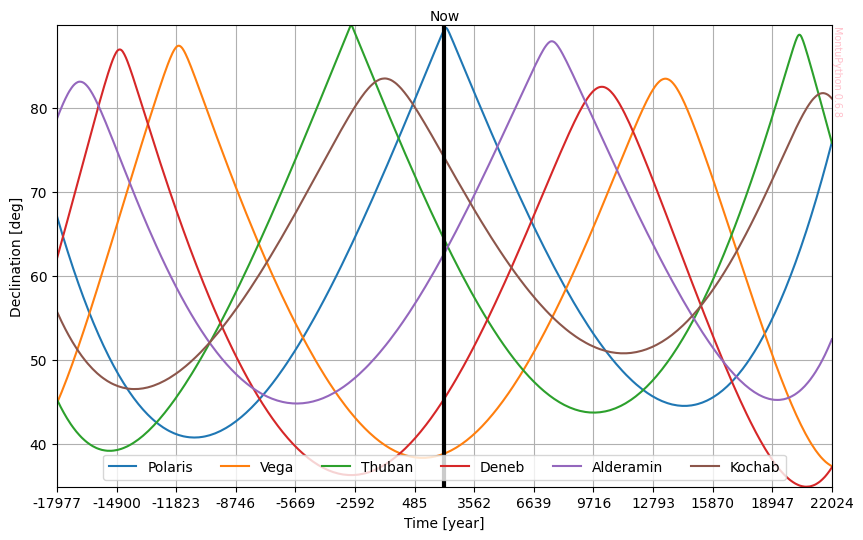

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
for star in star_names:
    ax.plot(df['tt'],df[star],label=star)

ax.legend(loc='lower center',ncol=len(star_names))
ax.set_xlabel("Time [year]")
ax.set_ylabel("Declination [deg]")
ax.axvline(MonTime().tt,color='k',lw=3)
ax.text(0.5,1.01,'Now',ha='center',transform=ax.transAxes)
ax.margins(0)
ax.set_xticks(np.linspace(df['tt'].min(),df['tt'].max(),14))
ax.grid()
MonTime.set_time_ticks(ax)
Montu.montu_mark(ax)
fig.savefig('gallery/pole-stars.png')

Check date when star is close to the pole:

In [ ]:
for star in star_names:
    imax = df[star].argmax()
    mtime = MonTime(df.iloc[imax].tt)
    print(f"Star {star} will be the closest to the pole at {mtime.datespice} (declination {D2H(df.iloc[imax][star])})")

Star Polaris will be the closest to the pole at 2083-11-07 23:27:23.4895 (declination 89:31:51.354)
Star Vega will be the closest to the pole at 11692 B.C. 10-12 08:22:01.527200 (declination 87:24:10.508)
Star Thuban will be the closest to the pole at 2803 B.C. 11-12 23:37:04.617900 (declination 89:54:19.214)
Star Deneb will be the closest to the pole at 14735 B.C. 08-30 11:42:18.980200 (declination 86:57:22.016)
Star Alderamin will be the closest to the pole at 7569-06-13 07:53:42.6437 (declination 87:55:56.040)
Star Kochab will be the closest to the pole at 1041 B.C. 08-30 22:56:24.100200 (declination 83:30:4.833)


In [ ]:
MonTime()

MonTime('2023-10-17 00:57:54.8065'/'2023-10-17 00:57:57')